In [2]:
# Hide deprecation warnings
import warnings
warnings.filterwarnings('ignore')

# Common imports
import numpy as np
import pandas as pd
import seaborn as sns
import squarify
import missingno as msno
from statsmodels.graphics.mosaicplot import mosaic


# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# To format floats
from IPython.display import display
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [3]:
#Load the csv files that we'll need for the EDA phase into Pandas dataframes, properly parsing dates

df_train = pd.read_csv('../data/raw/train_values.csv',parse_dates=['date_recorded'])
df_labels = pd.read_csv('../data/raw/train_labels.csv')

In [4]:
df_train.head().T

,0,1,2,3,4
id,69572,8776,34310,67743,19728
amount_tsh,6000.00000,0.00000,25.00000,0.00000,0.00000
date_recorded,2011-03-14 00:00:00,2013-03-06 00:00:00,2013-02-25 00:00:00,2013-01-28 00:00:00,2011-07-13 00:00:00
funder,Roman,Grumeti,Lottery Club,Unicef,Action In A
gps_height,1390,1399,686,263,0
installer,Roman,GRUMETI,World vision,UNICEF,Artisan
longitude,34.93809,34.69877,37.46066,38.48616,31.13085
latitude,-9.85632,-2.14747,-3.82133,-11.15530,-1.82536
wpt_name,none,Zahanati,Kwa Mahundi,Zahanati Ya Nanyumbu,Shuleni
num_private,0,0,0,0,0


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 40 columns):
id                       59400 non-null int64
amount_tsh               59400 non-null float64
date_recorded            59400 non-null datetime64[ns]
funder                   55765 non-null object
gps_height               59400 non-null int64
installer                55745 non-null object
longitude                59400 non-null float64
latitude                 59400 non-null float64
wpt_name                 59400 non-null object
num_private              59400 non-null int64
basin                    59400 non-null object
subvillage               59029 non-null object
region                   59400 non-null object
region_code              59400 non-null int64
district_code            59400 non-null int64
lga                      59400 non-null object
ward                     59400 non-null object
population               59400 non-null int64
public_meeting           56066 non-null 

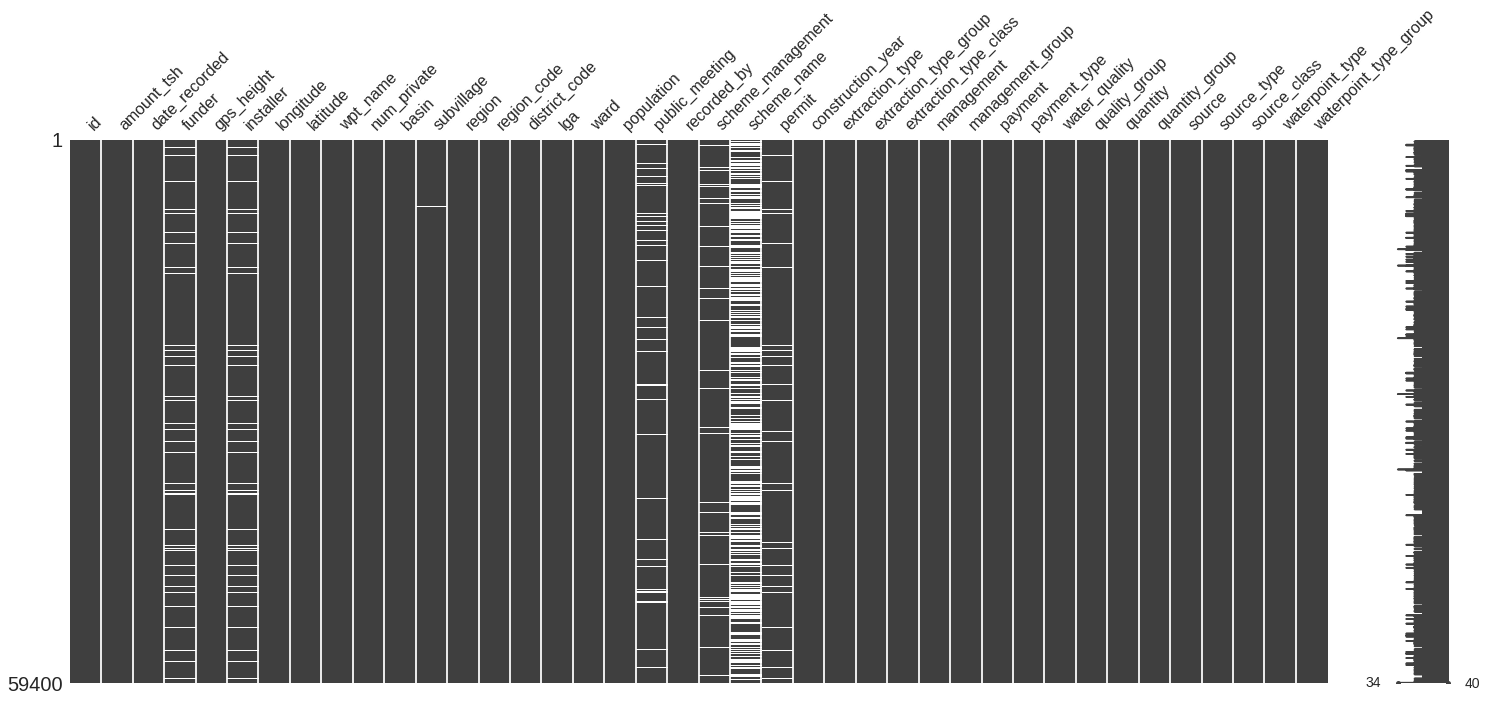

In [6]:
msno.matrix(df_train)

Numerical features

In [7]:
df_train.describe()

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,59400.00000,59400.00000,59400.00000,59400.00000,59400.00000,59400.00000,59400.00000,59400.00000,59400.00000,59400.00000
mean,37115.13177,317.65038,668.29724,34.07743,-5.70603,0.47414,15.29700,5.62975,179.90998,1300.65247
std,21453.12837,2997.57456,693.11635,6.56743,2.94602,12.23623,17.58741,9.63365,471.48218,951.62055
min,0.00000,0.00000,-90.00000,0.00000,-11.64944,0.00000,1.00000,0.00000,0.00000,0.00000
25%,18519.75000,0.00000,0.00000,33.09035,-8.54062,0.00000,5.00000,2.00000,0.00000,0.00000
50%,37061.50000,0.00000,369.00000,34.90874,-5.02160,0.00000,12.00000,3.00000,25.00000,1986.00000
75%,55656.50000,20.00000,1319.25000,37.17839,-3.32616,0.00000,17.00000,5.00000,215.00000,2004.00000
max,74247.00000,350000.00000,2770.00000,40.34519,-0.00000,1776.00000,99.00000,80.00000,30500.00000,2013.00000


Let's inspect now the categorical features

In [8]:
cat_df = pd.DataFrame(columns=["Feature", "Cardinality","% Missings"])

total_cardinality = 0

i=0

for col in df_train.columns:
    if (df_train[col].dtype == np.object):
        cat_df.loc[i,"Feature"] = col
        cat_df.loc[i,"Cardinality"] = len(df_train[col].unique())
        total_cardinality += len(df_train[col].unique())
        pct_of_missing_values = float((len(df_train[col]) - df_train[col].count()) / len(df_train[col]))
        cat_df.loc[i,"% Missings"] = pct_of_missing_values*100
        i+=1

print("Total cardinality of categorical features:",total_cardinality)

cat_df

Total cardinality of categorical features: 65822


,Feature,Cardinality,% Missings
0,funder,1898,6.11953
1,installer,2146,6.15320
2,wpt_name,37400,0.00000
3,basin,9,0.00000
4,subvillage,19288,0.62458
5,region,21,0.00000
6,lga,125,0.00000
7,ward,2092,0.00000
8,public_meeting,3,5.61279
9,recorded_by,1,0.00000


### Visualizations

In [9]:
data_viz = pd.concat([df_train,df_labels['status_group']],axis=1)

Label distribution

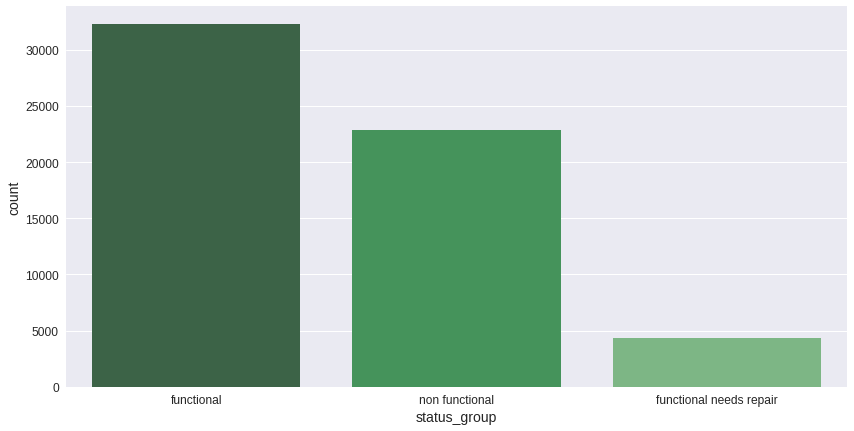

In [10]:
plt.figure(figsize=(14,7))
sns.countplot(x='status_group',data=data_viz, palette="Greens_d");

Construction year distribution

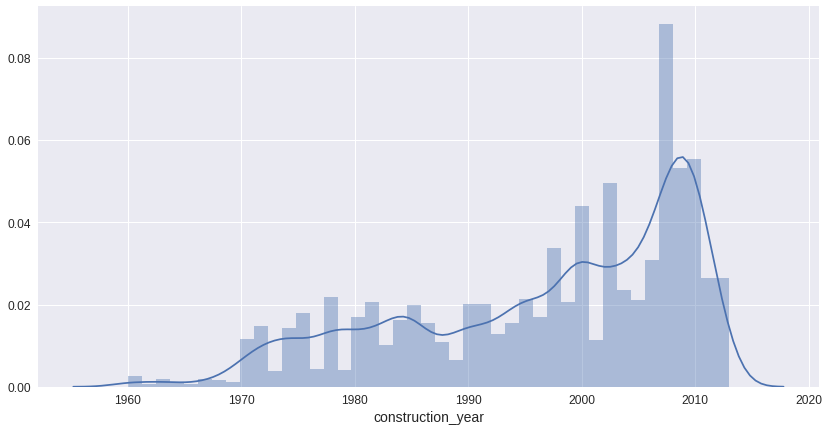

In [11]:
# We need to filter the instances with year 0 that will be taken care of in the Data Preparation part
plt.figure(figsize=(14,7))
sns.distplot(data_viz['construction_year'][data_viz['construction_year']>0]);

Water pump geographical distribution with population proportional circles and year of pump color bar

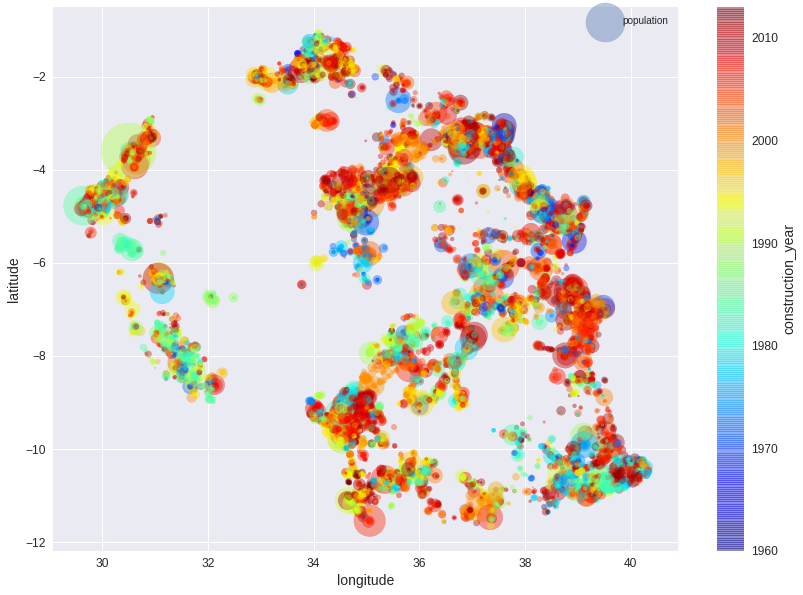

In [13]:
# We need to filter the instances with year 0, longitud 0 and latitude 0 in this case
data_viz[data_viz['longitude']>0][data_viz['latitude']<0][data_viz['construction_year']>0].plot\
    (kind="scatter", x="longitude", y="latitude", alpha=0.4,
    s=data_viz["population"]/10, label="population", figsize=(14,10),
    c="construction_year", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)
plt.legend;

Correlation heatmap of the numerical features

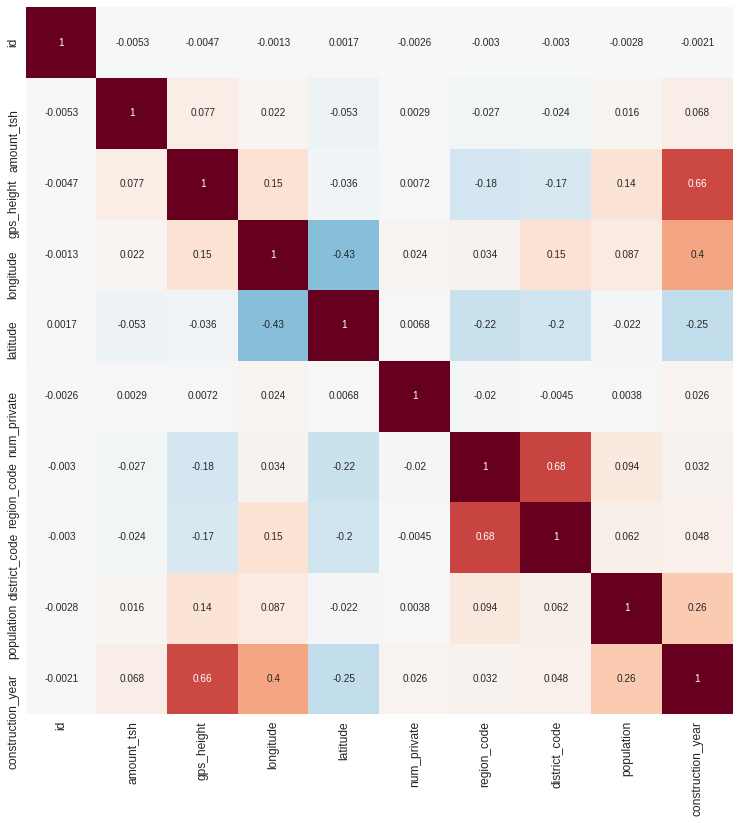

In [12]:
cor = data_viz.corr()
plt.figure(figsize=(14,13))
sns.heatmap(cor, square=True, annot=True, cbar=False);

Boxplot of label distribution by pump construction year

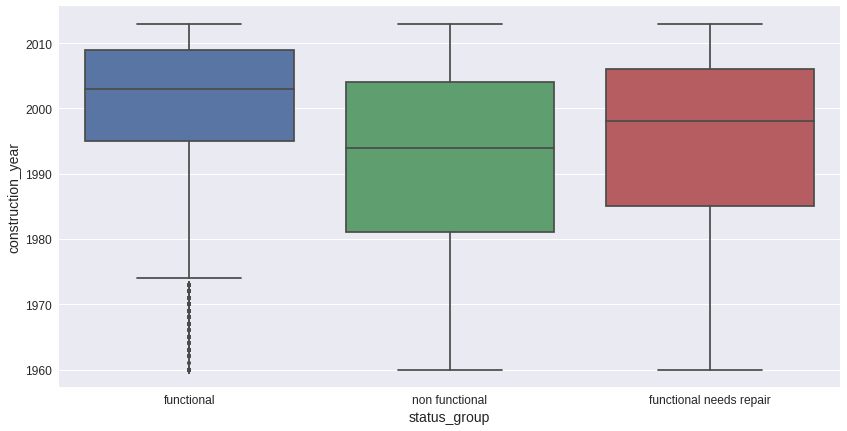

In [13]:
plt.figure(figsize=(14,7))
sns.boxplot(x='status_group', y="construction_year", data=data_viz[data_viz['construction_year']>0]);

A different way of seeing this same concept, with proportions within the distribution plot, using violin plots

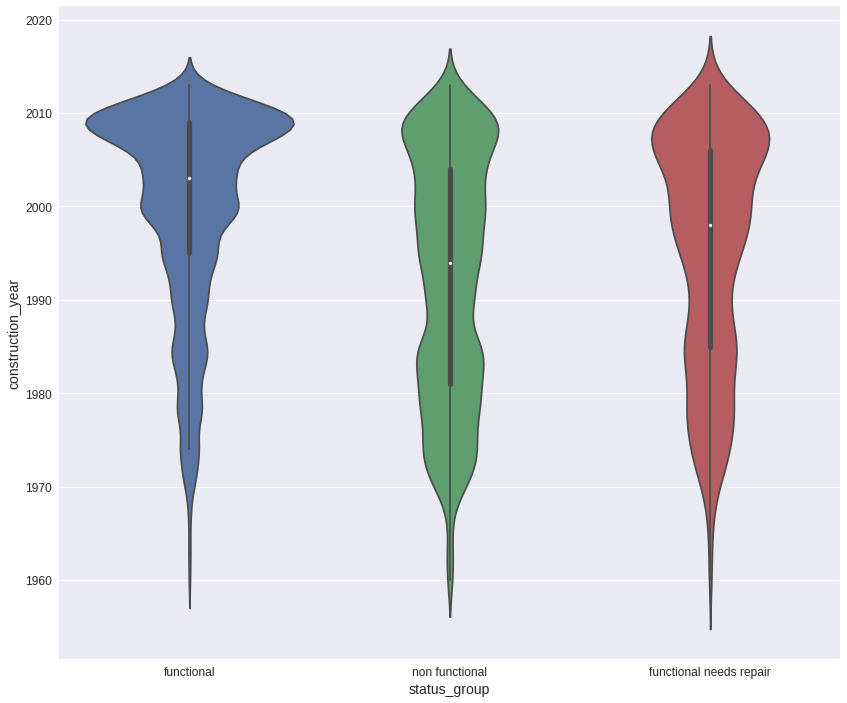

In [14]:
fig, ax = plt.subplots(figsize=(14,12));
ax = sns.violinplot(x='status_group', y="construction_year",\
                    data=data_viz[data_viz['construction_year']>0], split=True)

Mosaic of permit distribution per label

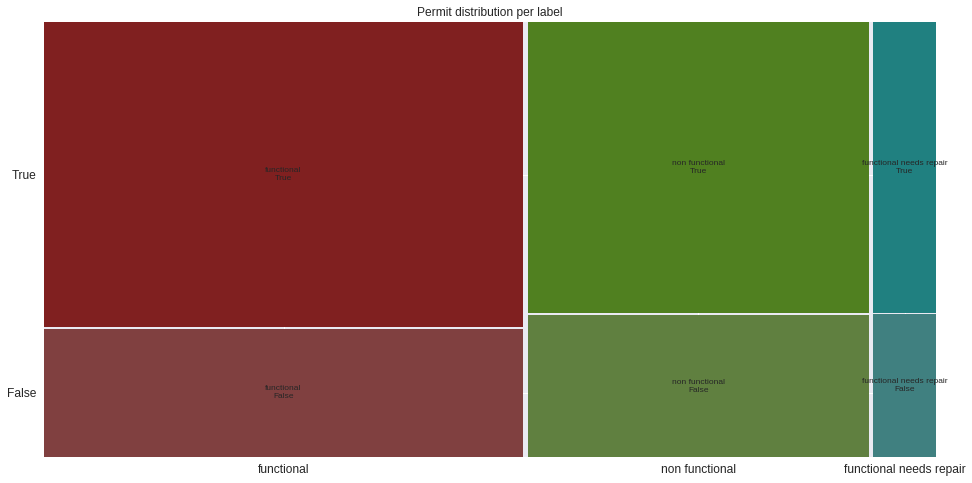

In [15]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(16, 8))
fig = mosaic(data_viz, ['status_group', 'permit'], axes, title="Permit distribution per label")

Mosaic of public meeting distribution per label

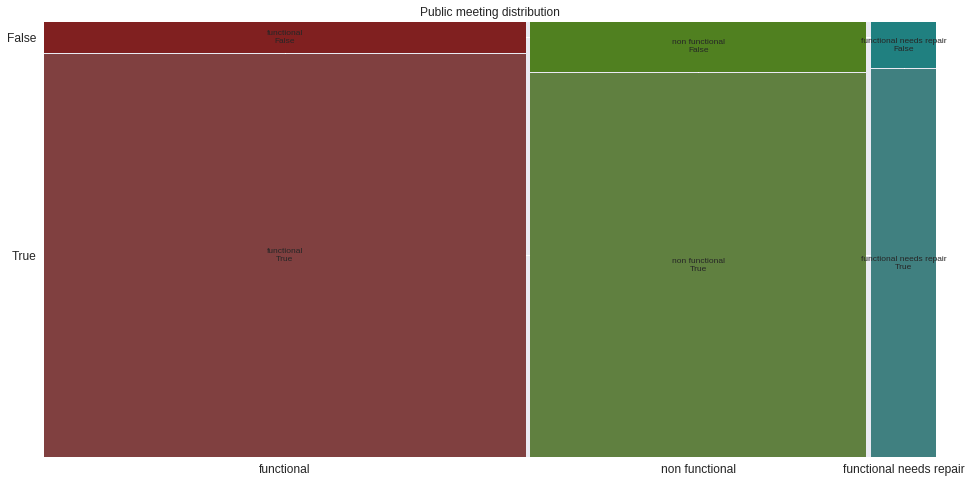

In [16]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(16, 8))
fig = mosaic(data_viz, ['status_group', 'public_meeting'], axes, title="Public meeting distribution")

Mosaic of source class distribution per label

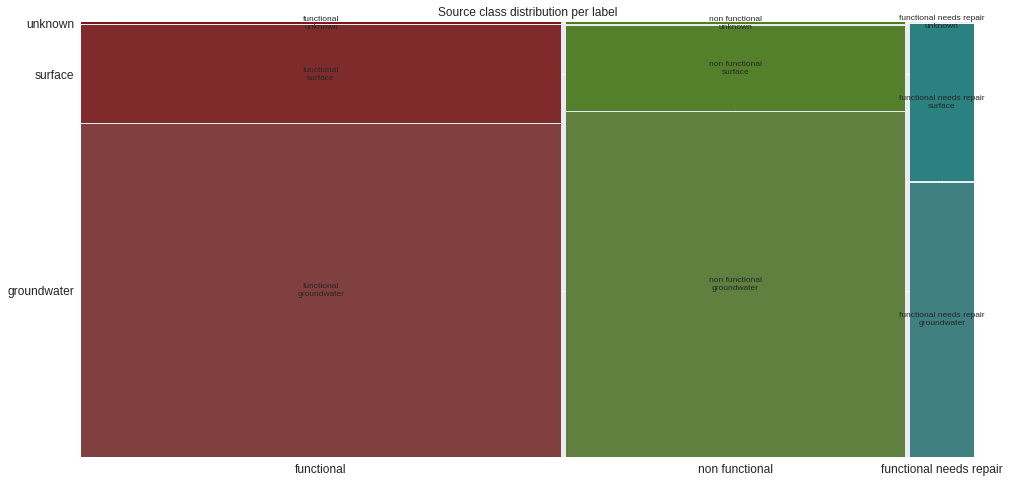

In [17]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(16, 8))
fig = mosaic(data_viz, ['status_group', 'source_class'], axes, title="Source class distribution per label")

Bar charts of some relevant categorical features per label

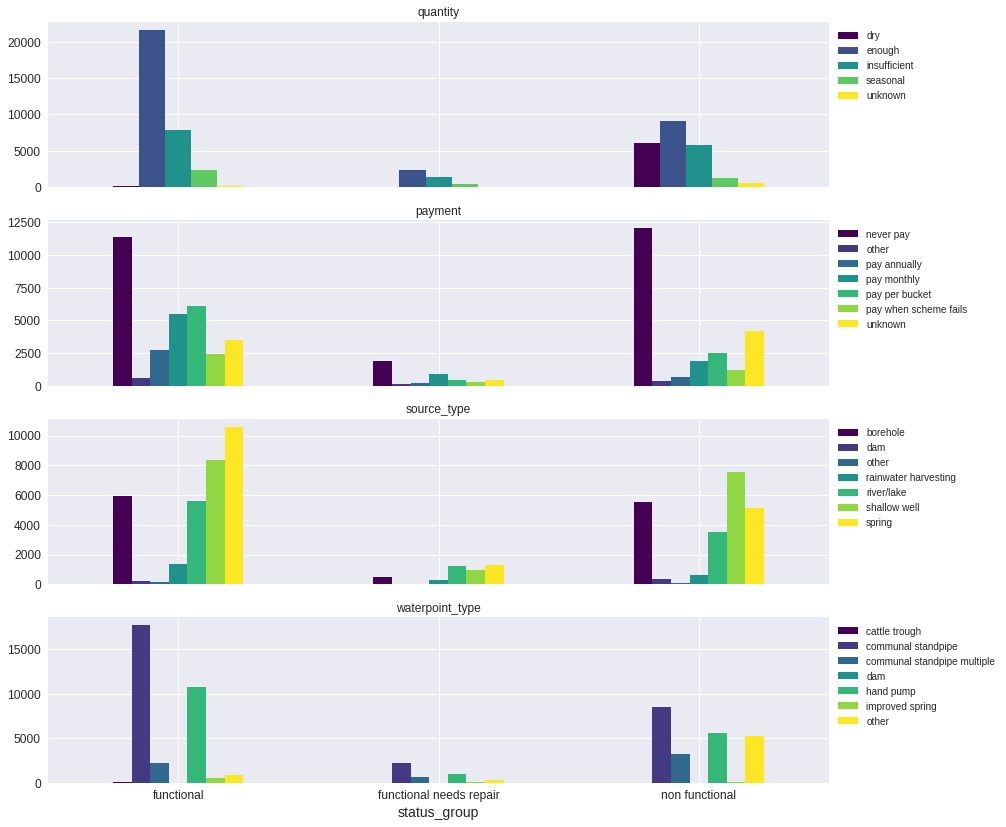

In [18]:
variables = ['quantity','payment','source_type','waterpoint_type']
label = 'status_group'

def plot_tables(data,label,variables):
    fig, axes = plt.subplots(nrows=len(variables), ncols=1, figsize = (14,14))
    for i,variable in enumerate(variables):
        ax = pd.pivot_table(data[[label,variable]], index = [label,variable], aggfunc = len)\
        .unstack(variable).plot(kind='bar', ax=axes[i], sharex=True, title=variable, rot=0, colormap='viridis')
        ax.legend(bbox_to_anchor=(1,1),loc="upper left")
        
plot_tables(data_viz,label,variables)

Value distribution for some important features with low cardinality

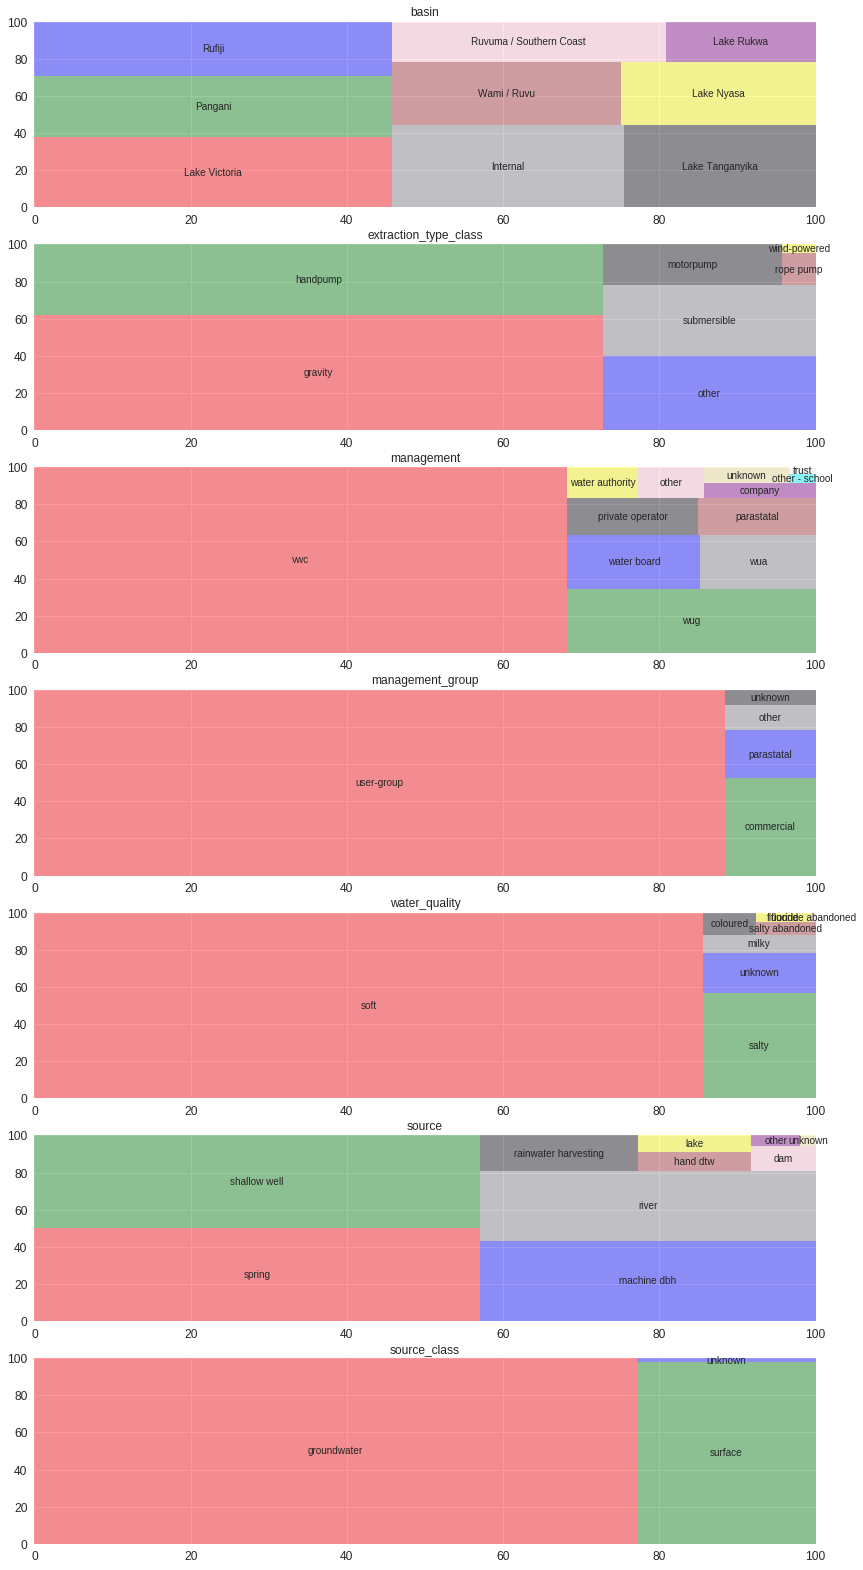

In [19]:
variables = ['basin','extraction_type_class','management','management_group',\
             'water_quality','source','source_class']
colors = ["red","green","blue", "grey", "black", "brown", "yellow", "pink", "purple", "khaki", "cyan","white"]

def plot_proportions(data,variables):
    fig, axes = plt.subplots(nrows=len(variables), ncols=1, figsize = (14,len(variables)*4))
    for i,variable in enumerate(variables):
        ax = squarify.plot(sizes=data[variable].value_counts().tolist(), \
                      label=data[variable].value_counts().index.tolist(), color=colors, ax=axes[i], alpha=.4)
        ax.set_title(variable)
        
plot_proportions(data_viz,variables)

Height distribution per label

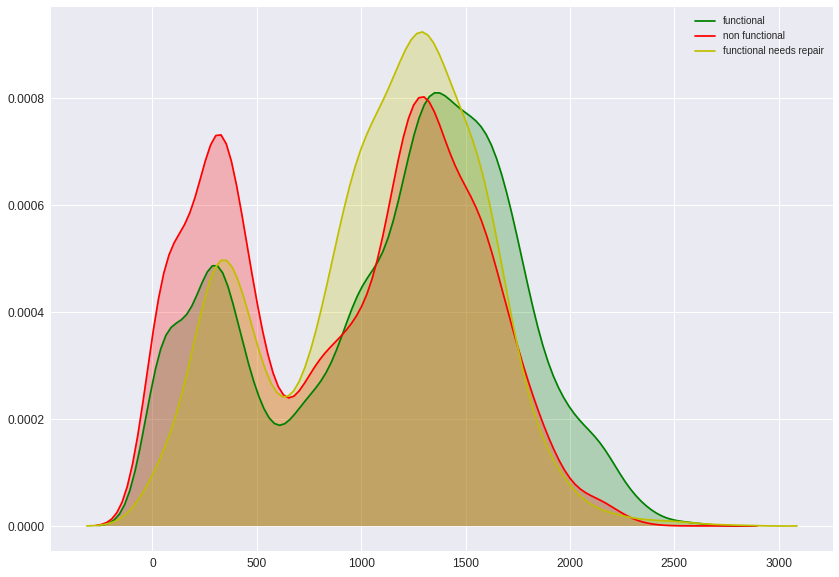

In [20]:
plt.figure(figsize=(14,10))

p1=sns.kdeplot(data_viz[['gps_height','status_group']][data_viz.status_group == 'functional']\
               [data_viz.gps_height > 0].gps_height, shade=True, color="g",label='functional')
p1=sns.kdeplot(data_viz[['gps_height','status_group']][data_viz.status_group == 'non functional']\
               [data_viz.gps_height > 0].gps_height, shade=True, color="r",label='non functional')
p1=sns.kdeplot(data_viz[['gps_height','status_group']][data_viz.status_group == 'functional needs repair']\
               [data_viz.gps_height > 0].gps_height, shade=True, color="y",label='functional needs repair')

Pair plot of the relevant numerical features against each other, differentiating by label value

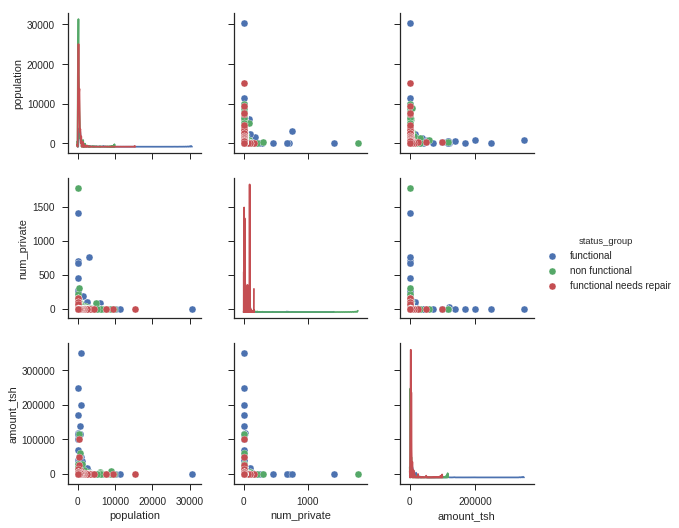

In [21]:
sns.set(style="ticks")
sns.pairplot(data_viz[['population','num_private','amount_tsh','status_group']],\
                    hue="status_group", diag_kind="kde");